In [8]:
import pandas as pd, geopandas as gpd, matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv('BetterLife_cleaned.csv')
file_in = 'custom.geo.json'
worldmap = gpd.read_file(file_in)

In [9]:
# Verificar los nombres únicos en el campo 'admin'
print(worldmap['admin'].unique())


['Costa Rica' 'Nicaragua' 'Haiti' 'Dominican Republic' 'El Salvador'
 'Guatemala' 'Cuba' 'Honduras' 'United States of America' 'Canada'
 'Mexico' 'Belize' 'Panama' 'Greenland' 'The Bahamas'
 'Trinidad and Tobago' 'Puerto Rico' 'Jamaica' 'Indonesia' 'Malaysia'
 'Cyprus' 'India' 'China' 'Israel' 'Palestine' 'Lebanon' 'Syria'
 'South Korea' 'North Korea' 'Bhutan' 'Oman' 'Uzbekistan' 'Kazakhstan'
 'Tajikistan' 'Mongolia' 'Vietnam' 'Cambodia' 'United Arab Emirates'
 'Georgia' 'Azerbaijan' 'Turkey' 'Laos' 'Kyrgyzstan' 'Armenia' 'Iraq'
 'Iran' 'Qatar' 'Saudi Arabia' 'Pakistan' 'Thailand' 'Kuwait' 'East Timor'
 'Brunei' 'Myanmar' 'Bangladesh' 'Afghanistan' 'Turkmenistan' 'Jordan'
 'Nepal' 'Yemen' 'Northern Cyprus' 'Philippines' 'Sri Lanka' 'Taiwan'
 'Japan' 'Chile' 'Bolivia' 'Peru' 'Argentina' 'Suriname' 'Guyana' 'Brazil'
 'Uruguay' 'Ecuador' 'Colombia' 'Paraguay' 'Venezuela' 'Falkland Islands'
 'Ethiopia' 'South Sudan' 'Somalia' 'Kenya' 'Malawi'
 'United Republic of Tanzania' 'Somaliland' 'Mo

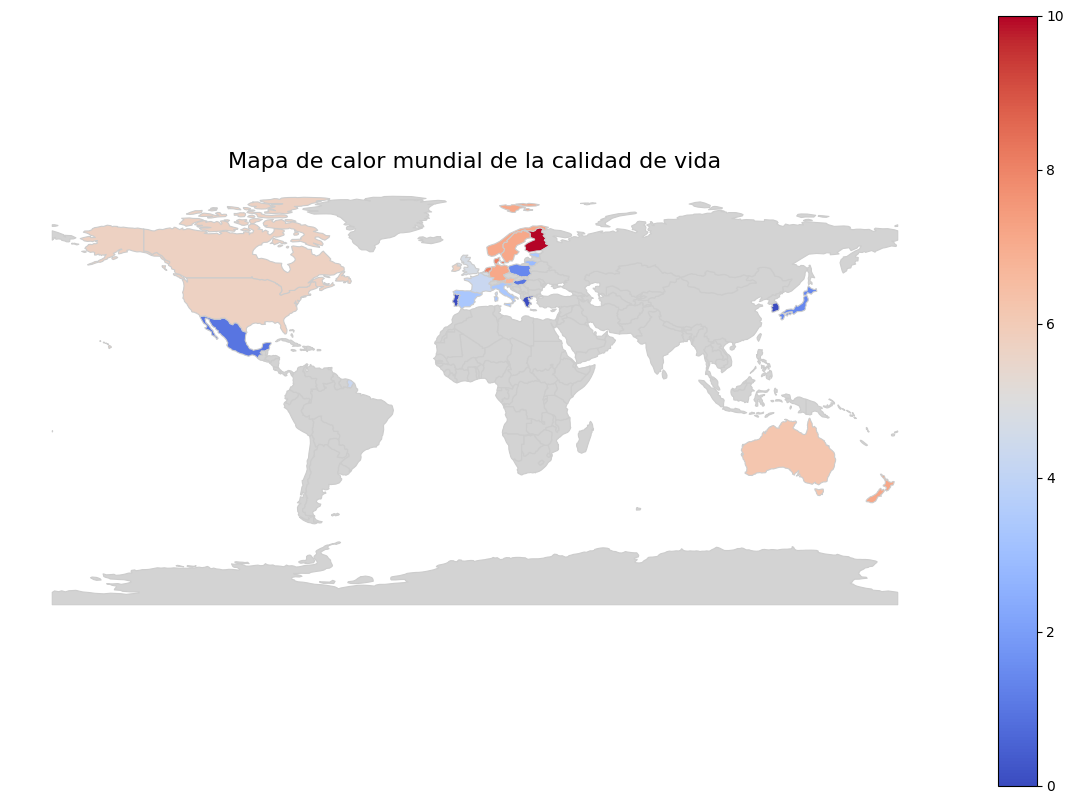

Países no mapeados: set()


In [10]:
df['Country'] = df['Country'].str.replace('United States', 'united states of america')

df['Country'] = df['Country'].str.strip().str.lower()
worldmap['admin'] = worldmap['admin'].str.strip().str.lower()

# Configurar el colormap y el color para los países sin datos
cmap = 'coolwarm'
missing_color = 'lightgrey'

# Crear el diccionario con los valores de 'Life Satisfaction' por país
life_satisfaction_dict = df.set_index('Country')['Life satisfaction'].to_dict()

# Asegurarse de que los valores de 'Life Satisfaction' estén mapeados correctamente
if 'Life Satisfaction' not in worldmap.columns:
    worldmap['Life Satisfaction'] = worldmap['admin'].map(life_satisfaction_dict)

# Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
worldmap.plot(
    column='Life Satisfaction',
    ax=ax,
    legend=True,
    cmap=cmap,
    missing_kwds={'color': missing_color, 'label': 'No data'},
    linewidth=0.8,
    edgecolor='0.8'
)

# Añadir título y ajustar el diseño
ax.set_title('Mapa de calor mundial de la calidad de vida', fontsize=16)
ax.set_axis_off()  # Eliminar los ejes para una apariencia más limpia

plt.show()

unmatched_countries = set(df['Country']) - set(worldmap['admin'])
print("Países no mapeados:", unmatched_countries)

Number of painted countries: 28
Unmatched countries: set()


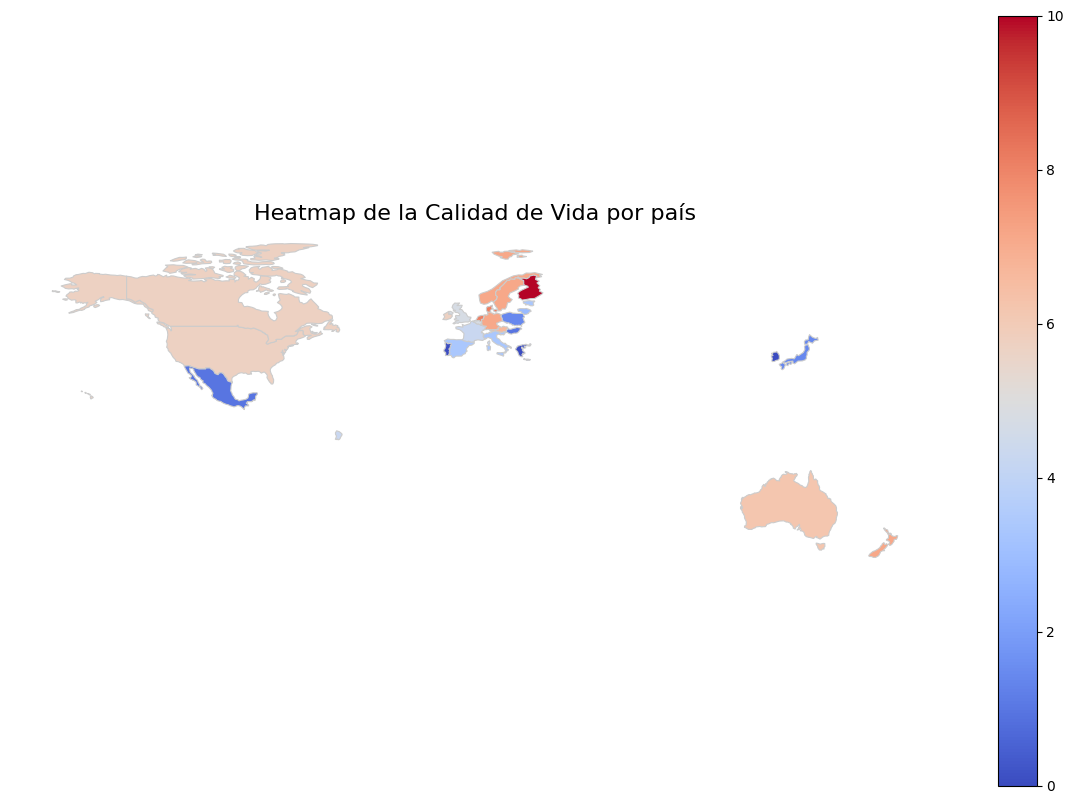

In [11]:
# Normalizar los nombres en ambos objetos
df['Country'] = df['Country'].str.strip().str.lower()
worldmap['admin'] = worldmap['admin'].str.strip().str.lower()

# Crear el diccionario nuevamente
life_satisfaction_dict = df.set_index('Country')['Life satisfaction'].to_dict()

# Mapear los valores al GeoDataFrame
worldmap['Life Satisfaction'] = worldmap['admin'].map(life_satisfaction_dict)

# Mapear los valores de 'Life Satisfaction' al GeoDataFrame
worldmap['Life Satisfaction'] = worldmap['admin'].map(life_satisfaction_dict)

# Contar cuántos países tienen valores no nulos en 'Life Satisfaction'
painted_countries = worldmap['Life Satisfaction'].notnull().sum()
print(f"Number of painted countries: {painted_countries}")

# Verificar qué países no están siendo mapeados
unmatched_countries = set(df['Country']) - set(worldmap['admin'])
print("Unmatched countries:", unmatched_countries)
# Crear un diccionario con los valores de 'Life Satisfaction' por país
life_satisfaction_dict = df.set_index('Country')['Life satisfaction'].to_dict()

# Crear una nueva columna en el GeoDataFrame con los valores de 'Life Satisfaction'
worldmap['Life Satisfaction'] = worldmap['admin'].map(life_satisfaction_dict)

# Configurar el colormap
cmap = 'coolwarm'

# Graficar el heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
worldmap.plot(column='Life Satisfaction', ax=ax, legend=True, cmap=cmap, linewidth=0.8, edgecolor='0.8')

# Añadir título y ajustar el diseño
ax.set_title('Heatmap de la Calidad de Vida por país', fontsize=16)
ax.set_axis_off()  # Eliminar los ejes para una apariencia más limpia

plt.show()


C:\Users\Juan López\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


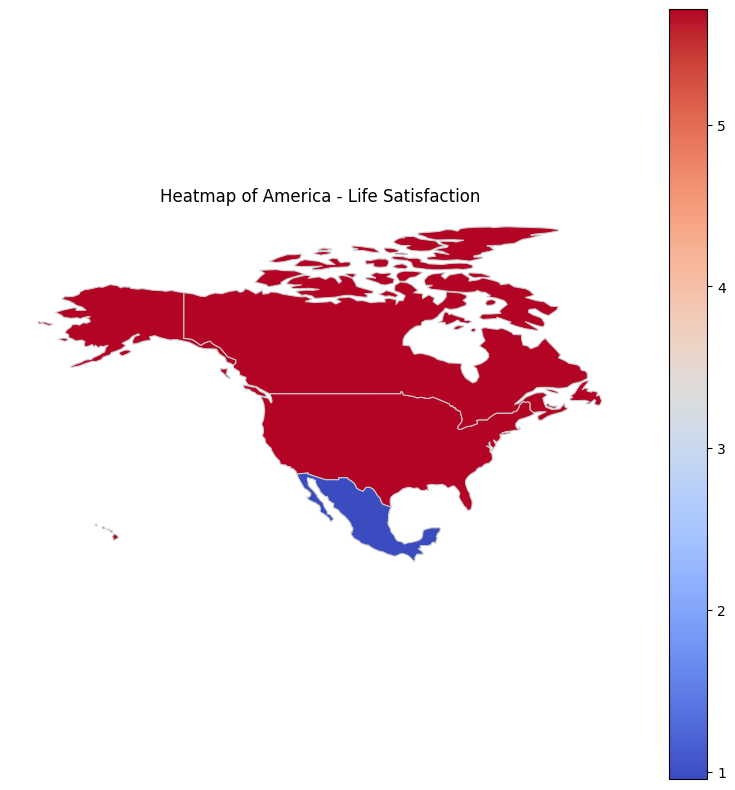

In [12]:
# Heatmap para América
df_america = worldmap[worldmap['continent'].isin(['North America', 'South America'])]

# Asegurarse de que los valores de 'Life Satisfaction' estén mapeados correctamente
df_america['Life Satisfaction'] = df_america['admin'].map(df.set_index('Country')['Life satisfaction'])

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_america.plot(column='Life Satisfaction', ax=ax, legend=True, cmap=cmap, linewidth=0.8, edgecolor='0.8')

# Add title and labels
ax.set_title('Heatmap of America - Life Satisfaction')
ax.set_axis_off()  # Remove axis for a cleaner look

plt.show()
None

C:\Users\Juan López\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


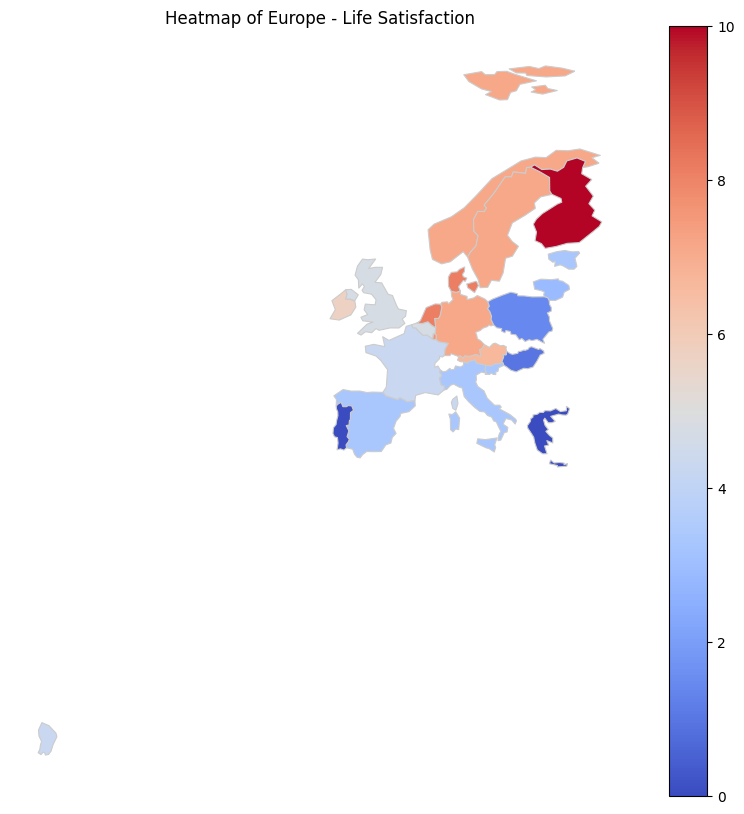

In [13]:

# Filtrar los datos para Europa
df_europa = worldmap[worldmap['continent'] == 'Europe']

# Asegurarse de que los valores de 'Life Satisfaction' estén mapeados correctamente
df_europa['Life Satisfaction'] = df_europa['admin'].map(df.set_index('Country')['Life satisfaction'])

# Graficar el heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_europa.plot(column='Life Satisfaction', ax=ax, legend=True, cmap=cmap, linewidth=0.8, edgecolor='0.8')

# Añadir título y etiquetas
ax.set_title('Heatmap of Europe - Life Satisfaction')
ax.set_axis_off()  # Eliminar los ejes para una apariencia más limpia

plt.show()
None

C:\Users\Juan López\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


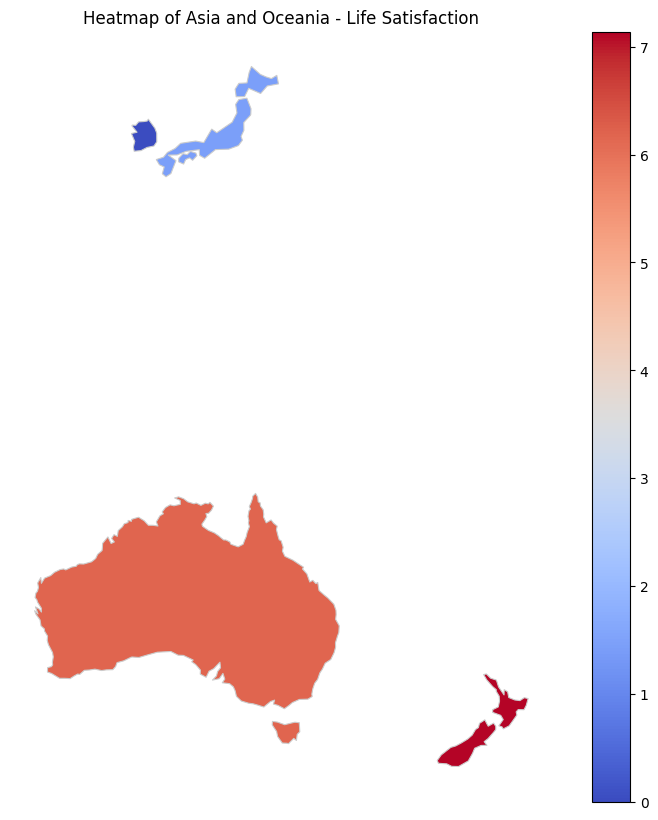

In [14]:
# Filtrar los datos para Asia y Oceanía
df_asia_oceania = worldmap[worldmap['continent'].isin(['Asia', 'Oceania'])]

# Asegurarse de que los valores de 'Life Satisfaction' estén mapeados correctamente
df_asia_oceania['Life Satisfaction'] = df_asia_oceania['admin'].map(df.set_index('Country')['Life satisfaction'])

# Graficar el heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_asia_oceania.plot(column='Life Satisfaction', ax=ax, legend=True, cmap=cmap, linewidth=0.8, edgecolor='0.8')

# Añadir título y etiquetas
ax.set_title('Heatmap of Asia and Oceania - Life Satisfaction')
ax.set_axis_off()  # Eliminar los ejes para una apariencia más limpia

plt.show()